<a href="https://colab.research.google.com/github/MarcoE25/Clases-Analisis-Datos/blob/main/Clase_7_intermedio_202508.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚀 Itinerario de clase

* Filtros con Query de pandas
* Gráficos directos
* Tablas dinámicas
* Índices
* Iteración sobre dataframes

# Resumen de la clase anterior

In [ ]:
# PONER EN LA PRIMER CELDA TODAS LAS LIBRERÍAS
import pandas as pd
from dateutil import parser
import datetime as dt
import random as r
import numpy as np

# Webscraping
import urllib.request, json
from urllib.request import urlopen
from zipfile import ZipFile
import re
import requests

################################################################################
############################ CARGA DE LA INFORMACION ###########################
################################################################################
df_bank = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1.csv")
df_bank_ej = pd.read_csv("https://cursopypagina.github.io/CursoPy/Clase_1_5.csv")

df_bank_ej = df_bank_ej.rename(columns={"Fecha_Inicio_Contrato": "Fecha_Inicio"})
df_bank_ej = df_bank_ej[["Nombre_Empresa", "Ejecutivo", "Fecha_Inicio"]]

################################################################################
############################ VALORES DEL USD-EUR ###############################
################################################################################
def divisa_webs(clave):
  url = "https://www.piplatam.com/Home/filiales?country=MX"
  page = urlopen(url)
  htmlBytes = page.read()
  html = htmlBytes.decode("utf-8")
  strValorClave = html.find(clave)
  stringFiltro1 = html[strValorClave:]
  strValor = stringFiltro1.split("dblValue")[1].split("dblChange")[0]
  strValor = re.findall(r"\d+\.\d+", strValor)[0]
  return strValor

usdValor = round(float(divisa_webs("USD-MXN FIX (Banxico)")), 2)
eurValor = round(float(divisa_webs("EUR-MXN")), 2)

################################################################################
########################## LIMPIEZA Y PROCESAMIENTO ############################
################################################################################
def clean_1(df_func, tipo):
  df_func_trabajo = df_func.copy()
  df_func_trabajo['Nombre_Empresa'] = df_func_trabajo['Nombre_Empresa'].str.strip().str.title()
  df_func_trabajo["Fecha_Inicio"] = df_func_trabajo["Fecha_Inicio"].apply(lambda x: parser.parse(x))

  if tipo == "Ejecutivo":
    ############################################################################
    # Agregamos la parte donde nos quedamos solo con un ejecutivo de ventas
    df_func_trabajo = df_func_trabajo.groupby("Nombre_Empresa").agg(
        {
            "Fecha_Inicio": ['max'],
            "Ejecutivo": ['last']
        }
    )
    df_func_trabajo = df_func_trabajo.reset_index()
    df_func_trabajo.columns = ['Nombre_Empresa', 'Fecha_Inicio', 'Ejecutivo']
    del df_func_trabajo['Fecha_Inicio']
    return df_func_trabajo
  elif tipo == "General":
    df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].fillna('1900-01-01')
    df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].fillna(0)
    df_func_trabajo['Plazo'] = df_func_trabajo['Plazo'].astype(int)

    df_func_trabajo['Fecha_Fin'] = df_func_trabajo['Fecha_Fin'].apply(lambda x: parser.parse(x))
    df_func_trabajo['Operacion'] = df_func_trabajo['Operacion'].str.split("-").apply(lambda x: x[1])

    fechaReporte = dt.datetime.today() - dt.timedelta(days = 1)
    fechaReporte = dt.datetime.strftime(fechaReporte, "%Y-%m-%d")
    df_func_trabajo['Fecha_Reporte'] = fechaReporte

    # Columnas condicionales
    zonas = ["Norte", "Sur", "Centro"]
    df_func_trabajo['Zonas'] = [r.choice(zonas) for i in range(len(df_func_trabajo))]

    def valorizador(divisa):
      if divisa == "USD":
        return usdValor
      elif divisa == "EUR":
        return eurValor
      else:
        return 1
    df_func_trabajo['Divisa_Valor'] = df_func_trabajo['Divisa'].apply(valorizador)
    df_func_trabajo['Monto_Credito'] = df_func_trabajo['Monto_Credito'] * df_func_trabajo['Divisa_Valor']
    del df_func_trabajo['Divisa_Valor']

    return df_func_trabajo
  else:
    print("⚠️Nombre inválido⚠️")

################################################################################
##################### APLICAMOS LA FUNCION DE LIMPIEZA #########################
################################################################################
df_bank_clean = clean_1(df_bank, "General")
df_bank_clean_ej = clean_1(df_bank_ej, "Ejecutivo")

### Merges

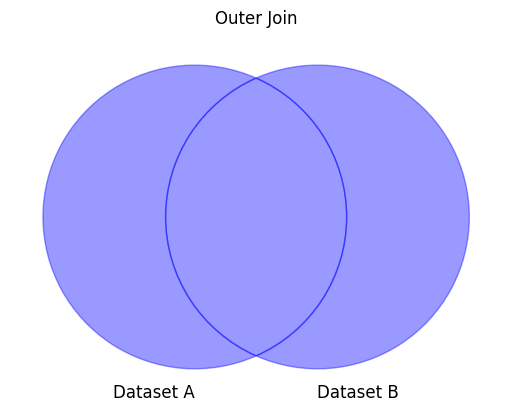

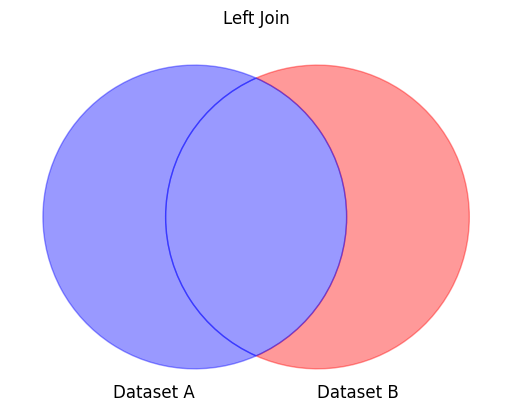

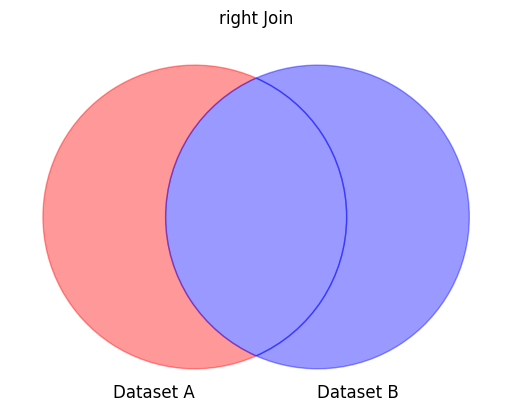

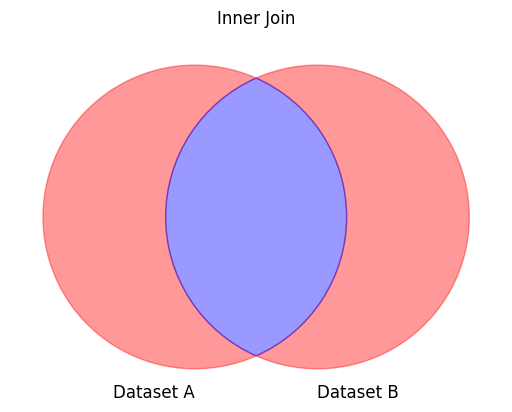

In [ ]:
# @title
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Outer Join')
plt.show()

# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('red')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Left Join')
plt.show()

venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('red')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('blue')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('right Join')
plt.show()


# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('Dataset A', 'Dataset B'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('red')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('red')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('')
venn1.get_label_by_id('01').set_text('')

plt.title('Inner Join')
plt.show()

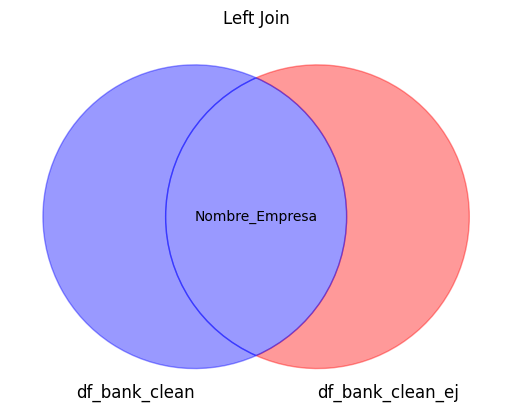

In [ ]:
# @title Texto de título predeterminado
# definimos un diagrama de venn
venn1 = venn2((1,1,1),
              set_labels = ('df_bank_clean', 'df_bank_clean_ej'))

# configuramos un mismo color para las tres partes
venn1.get_patch_by_id('10').set_color('blue')
venn1.get_patch_by_id('11').set_color('blue')
venn1.get_patch_by_id('01').set_color('red')

# Para quitar los unos que se ven por defecto
# colocamos como etiquetas cadenas vacias
venn1.get_label_by_id('10').set_text('')
venn1.get_label_by_id('11').set_text('Nombre_Empresa')
venn1.get_label_by_id('01').set_text('')

plt.title('Left Join')
plt.show()

In [ ]:
df_bank_final = df_bank_clean.merge(df_bank_clean_ej, on='Nombre_Empresa', how='left')
df_bank_final.head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
2,Liverpool,2.151252e+08,EUR,100002,2017-04-21,1900-01-01,0,2025-09-12,Centro,Dr. Virginia Pelayo
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
4,Femsa,1.546204e+08,EUR,100004,2024-10-30,1900-01-01,0,2025-09-12,Sur,Gabino Mariano Laureano Puente


---

### Filtros

In [ ]:
# -> Cuanto debe bimbo
#   1. Filtrar a bimbo
#   2. sum() sobre "algo"
mask_booleano_bimbo = df_bank_final['Nombre_Empresa'] == "Grupo Bimbo"
df_bank_final_bimbo = df_bank_final[mask_booleano_bimbo]
df_bank_final_bimbo.head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
8,Grupo Bimbo,1.862216e+08,EUR,100008,2022-12-25,1900-01-01,0,2025-09-12,Sur,Luis Manuel Ana María Vera Domínguez
9,Grupo Bimbo,8.004489e+06,EUR,100009,2024-08-05,1900-01-01,0,2025-09-12,Sur,Luis Manuel Ana María Vera Domínguez
11,Grupo Bimbo,1.951139e+08,EUR,100011,2020-03-23,1900-01-01,0,2025-09-12,Centro,Luis Manuel Ana María Vera Domínguez
40,Grupo Bimbo,9.536727e+07,EUR,100040,2024-08-08,1900-01-01,0,2025-09-12,Sur,Luis Manuel Ana María Vera Domínguez


In [ ]:
# Cuantos creditos tiene bimbo con .shape
# (n_filas, n_columnas)
print(df_bank_final_bimbo.shape)

# Contando las filas de una columna con .count()
print(df_bank_final_bimbo['Ejecutivo'].count())

(656, 10)
656


In [ ]:
# query pandas: una alternativa para realizar filtros
# con una especie de sintaxis similar a SQL
df_bank_final.query(" Nombre_Empresa == 'Grupo Bimbo' ").head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
8,Grupo Bimbo,1.862216e+08,EUR,100008,2022-12-25,1900-01-01,0,2025-09-12,Sur,Luis Manuel Ana María Vera Domínguez
9,Grupo Bimbo,8.004489e+06,EUR,100009,2024-08-05,1900-01-01,0,2025-09-12,Sur,Luis Manuel Ana María Vera Domínguez
11,Grupo Bimbo,1.951139e+08,EUR,100011,2020-03-23,1900-01-01,0,2025-09-12,Centro,Luis Manuel Ana María Vera Domínguez
40,Grupo Bimbo,9.536727e+07,EUR,100040,2024-08-08,1900-01-01,0,2025-09-12,Sur,Luis Manuel Ana María Vera Domínguez


In [ ]:
# <, >, <=, >=, ==, !=, in
# no quieres Euros
df_bank_final.query("Divisa != 'EUR'").head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
5,Grupo Lala,7.674495e+06,MXN,100005,2024-12-09,1900-01-01,0,2025-09-12,Centro,Juana Antonia Lira Samaniego
13,América Móvil,3.459971e+06,MXN,100013,2019-10-08,1900-01-01,0,2025-09-12,Centro,Cristobal Miguel Ángel Armenta Mayorga


### ~: Negación lógica en filtros

```python
# Todas las filas donde la divisa o es pesos o es dolares
maskBooleanaIn = df_bank_final['Divisa'].isin(['MXN', 'USD'])
df_bank_final[maskBooleanaIn]
```

---

```python
# Todas las filas donde la divisa no es pesos ni es dolares
maskBooleanaIn = ~df_bank_final['Divisa'].isin(['MXN', 'USD'])
df_bank_final[maskBooleanaIn]
```

In [ ]:
# & (dataframes) and---> conjunción
print("True and True   = ", True and True)
print("True and False  = ", True and False)
print("False and True  = ", False and True)
print("False and False = ", False and False)
print("-" * 25)
print("True or True   = ", True or True)
print("True or False  = ", True or False)
print("False or True  = ", False or True)
print("False or False = ", False or False)

True and True   =  True
True and False  =  False
False and True  =  False
False and False =  False
-------------------------
True or True   =  True
True or False  =  True
False or True  =  True
False or False =  False


Leyes de De Morgan

* $\lor$ --> or lógico
* $\land$ --> and lógico
* $\neg(p \lor q)=\neg p \land \neg q$

```
~df_bank_final['Divisa'].isin(['MXN', 'USD'])
                   p                       q
~((df_bank_final['Divisa'] == 'MXN') or (df_bank_final['Divisa'] == 'USD'))
```

In [ ]:
# dataframe['nombrecolumna'].isin(['MXN', 'USD']): te regresa True
# en todas las coicidencia donde las categorias de la columna
# nombrecolumna sean alguna de las opciones de lista LISTA
maskBooleanaIn = df_bank_final['Divisa'].isin(['MXN', 'USD'])
df_bank_final[maskBooleanaIn]

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
5,Grupo Lala,7.674495e+06,MXN,100005,2024-12-09,1900-01-01,0,2025-09-12,Centro,Juana Antonia Lira Samaniego
13,América Móvil,3.459971e+06,MXN,100013,2019-10-08,1900-01-01,0,2025-09-12,Centro,Cristobal Miguel Ángel Armenta Mayorga
...,...,...,...,...,...,...,...,...,...,...
9995,Bbva México,7.649614e+06,MXN,109995,2021-01-02,2023-03-01,788,2025-09-12,Centro,Víctor Durán de la Crúz
9996,Soriana,1.578366e+06,MXN,109996,2017-02-28,2022-02-12,1810,2025-09-12,Sur,Alfonso Natalia Sevilla
9997,Walmart De México,2.057032e+06,MXN,109997,2020-05-19,1900-01-01,0,2025-09-12,Sur,Eloisa Salinas Aguilar
9998,Grupo Bimbo,6.555259e+06,MXN,109998,2017-05-13,2019-12-24,955,2025-09-12,Centro,Luis Manuel Ana María Vera Domínguez


---


In [ ]:
# Info donde no haya euros
df_bank_final[df_bank_final['Divisa'] != 'EUR'].head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
5,Grupo Lala,7.674495e+06,MXN,100005,2024-12-09,1900-01-01,0,2025-09-12,Centro,Juana Antonia Lira Samaniego
13,América Móvil,3.459971e+06,MXN,100013,2019-10-08,1900-01-01,0,2025-09-12,Centro,Cristobal Miguel Ángel Armenta Mayorga


In [ ]:
df_bank_final[~(df_bank_final['Divisa'] == 'EUR')].head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
5,Grupo Lala,7.674495e+06,MXN,100005,2024-12-09,1900-01-01,0,2025-09-12,Centro,Juana Antonia Lira Samaniego
13,América Móvil,3.459971e+06,MXN,100013,2019-10-08,1900-01-01,0,2025-09-12,Centro,Cristobal Miguel Ángel Armenta Mayorga


In [ ]:
# Divisa in ['MXN', 'USD'] <---> (Divisa == 'MXN') OR (Divisa == 'USD')
df_bank_final.query("Divisa in ['MXN', 'USD']").head()

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
5,Grupo Lala,7.674495e+06,MXN,100005,2024-12-09,1900-01-01,0,2025-09-12,Centro,Juana Antonia Lira Samaniego
13,América Móvil,3.459971e+06,MXN,100013,2019-10-08,1900-01-01,0,2025-09-12,Centro,Cristobal Miguel Ángel Armenta Mayorga


In [ ]:
df_bank_final['Monto_Credito'].max()

216758607.0111

In [ ]:
# Caracteristicas del credito de monto mas grande
#                                               -------------- numero -------------
df_bank_final[df_bank_final['Monto_Credito'] == df_bank_final['Monto_Credito'].max()]

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
2592,Banorte,2.167586e+08,EUR,102592,2020-11-02,2021-08-27,298,2025-09-12,Norte,Eloisa Salinas Aguilar


In [ ]:
# query(string) ---> @ ----> f-string
# f"Es un string normal con {variables}""

In [ ]:
# .query() es pandas y sigue una notacion similar a SQL
# Pero no es SQL

# @ te permite colocar variables dentro de la funcion query
# (exclusiva en el contexto de filtros) dentro del
# string de filtro
montoMax = df_bank_final['Monto_Credito'].max()
df_bank_final.query("Monto_Credito == @montoMax")

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
2592,Banorte,2.167586e+08,EUR,102592,2020-11-02,2021-08-27,298,2025-09-12,Norte,Eloisa Salinas Aguilar


In [ ]:
# df_bank_final[~(df_bank_final['Divisa'] == 'EUR')].head()
df_bank_final.query("not(Divisa == 'EUR')")

,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo,Fecha_Reporte,Zonas,Ejecutivo
0,Grupo Bimbo,4.117590e+06,MXN,100000,2019-08-27,2023-04-24,1336,2025-09-12,Norte,Luis Manuel Ana María Vera Domínguez
1,Walmart De México,1.295084e+08,USD,100001,2017-04-10,2022-02-18,1775,2025-09-12,Sur,Eloisa Salinas Aguilar
3,Grupo Lala,2.389544e+07,USD,100003,2023-11-24,1900-01-01,0,2025-09-12,Sur,Juana Antonia Lira Samaniego
5,Grupo Lala,7.674495e+06,MXN,100005,2024-12-09,1900-01-01,0,2025-09-12,Centro,Juana Antonia Lira Samaniego
13,América Móvil,3.459971e+06,MXN,100013,2019-10-08,1900-01-01,0,2025-09-12,Centro,Cristobal Miguel Ángel Armenta Mayorga
...,...,...,...,...,...,...,...,...,...,...
9995,Bbva México,7.649614e+06,MXN,109995,2021-01-02,2023-03-01,788,2025-09-12,Centro,Víctor Durán de la Crúz
9996,Soriana,1.578366e+06,MXN,109996,2017-02-28,2022-02-12,1810,2025-09-12,Sur,Alfonso Natalia Sevilla
9997,Walmart De México,2.057032e+06,MXN,109997,2020-05-19,1900-01-01,0,2025-09-12,Sur,Eloisa Salinas Aguilar
9998,Grupo Bimbo,6.555259e+06,MXN,109998,2017-05-13,2019-12-24,955,2025-09-12,Centro,Luis Manuel Ana María Vera Domínguez


# Resumen hasta el momento

* Máscara booleana: Columna o dataframe de puros valores lógicos.
* ``pd.query(StringQuery)``: ``StringQuery`` son sirve para implementar filtros:

1. <, >, <=, >=, ==, !=
2. and, or, not, in
3. ``@``: Vas a poder estar implementado variabilidad dentro de tu ``StringQuery``

---

# Preguntas de análisis

1. ¿Cuál es el monto total de crédito otorgado por divisa?
2. ¿Cuáles son las 5 empresas que han recibido más crédito en total?
3. ¿Cuál es el monto total de créditos vigentes (sin Fecha_Fin real) por zona?
4. ¿Cuál es el monto total de crédito por zona y por divisa?
5. ¿Cuántas operaciones se han realizado por cada empresa?
6. ¿Cuál es el promedio de plazo de los créditos por zona?
7. ¿Qué zona ha recibido más créditos en total (suma del monto)?
8. ¿Cuántas operaciones se han realizado en cada divisa?
9. ¿Qué empresas tienen créditos activos (Fecha_Fin = 1900-01-01)?
10. ¿Qué porcentaje del total de crédito corresponde a cada divisa?

### En el caso en el que tengas que aplicar filtros, plantea entonces dos soluciones, una con filtros vía máscaras booleanas y la otra usando la función query()

In [ ]:
#@ Soluciones
df_bank_clean.to_excel("df_final.xlsx", index=False)

# Cargar el archivo
df = pd.read_excel("/content/df_final.xlsx")

# Pregunta 1: Monto total de crédito otorgado por divisa
total_credito_por_divisa = df.groupby("Divisa")["Monto_Credito"].sum()

# Pregunta 2: Top 5 empresas que han recibido más crédito
top_5_empresas_credito = df.groupby("Nombre_Empresa")["Monto_Credito"].sum().sort_values(ascending=False).head(5)

# Pregunta 3: Monto total de créditos vigentes por zona (Fecha_Fin = 1900-01-01)
creditos_vigentes = df[df['Fecha_Fin'] == pd.Timestamp("1900-01-01")]
monto_vigente_por_zona = creditos_vigentes.groupby("Zonas")["Monto_Credito"].sum()

# Pregunta 4: Monto total de crédito por zona y por divisa
monto_por_zona_divisa = df.groupby(["Zonas", "Divisa"])["Monto_Credito"].sum()

# Pregunta 5: Número de operaciones por empresa
operaciones_por_empresa = df.groupby("Nombre_Empresa")["Operacion"].count()

# Pregunta 6: Promedio del plazo de los créditos por zona
promedio_plazo_por_zona = df.groupby("Zonas")["Plazo"].mean()

# Pregunta 7: Zona con mayor monto total de créditos
monto_total_por_zona = df.groupby("Zonas")["Monto_Credito"].sum()

# Pregunta 8: Número de operaciones por divisa
operaciones_por_divisa = df.groupby("Divisa")["Operacion"].count()

# Pregunta 9: Empresas con créditos activos (Fecha_Fin = 1900-01-01)
empresas_creditos_activos = creditos_vigentes["Nombre_Empresa"].unique()

# Pregunta 10: Porcentaje del total de crédito por divisa
total_credito = df["Monto_Credito"].sum()
porcentaje_credito_por_divisa = (df.groupby("Divisa")["Monto_Credito"].sum() / total_credito) * 100


# Gráficos directos

<Axes: xlabel='Divisa'>

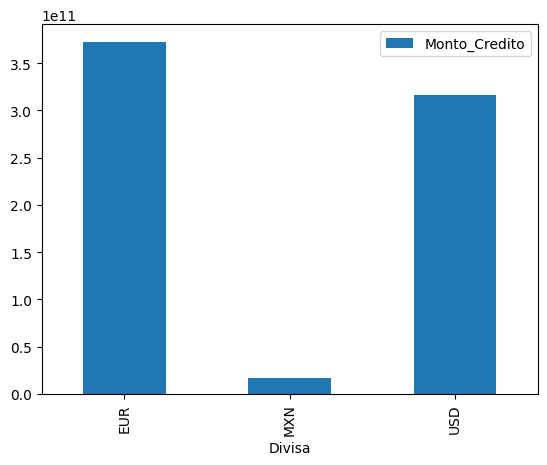

In [ ]:
# Anclamos por divisa y obtenemos la suma del monto del credito
df_bank_final_gby_divisa = df_bank_final[['Divisa', 'Monto_Credito']].groupby("Divisa").sum().reset_index()

# los graficos directos con pandas sirven para explorar visualmente y rapidamente
# tus datos

# plot.tipoGrafico
df_bank_final_gby_divisa.plot.bar(x="Divisa", y="Monto_Credito")

<Axes: xlabel='Plazo', ylabel='Monto_Credito'>

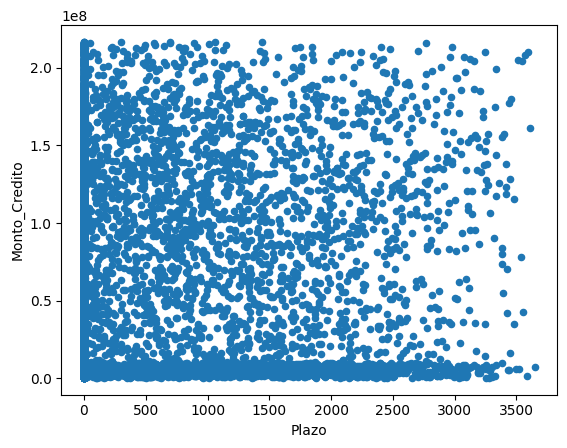

In [ ]:
df_bank_final.plot.scatter(x='Plazo', y='Monto_Credito')

<Axes: xlabel='Fecha_Fin'>

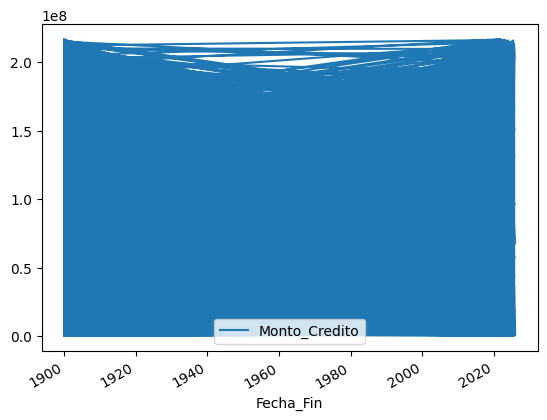

In [ ]:
# Caso 1: la columna fecha de inicio era un objeto fecha ---> se veia horrible nuestro grafico
# Caso 2: la columna fecha de inicio es un string fecha

################################################################################
# Objeto fecha
df_bank_final.plot.line(x='Fecha_Fin', y='Monto_Credito')

<Axes: xlabel='Fecha_Inicio'>

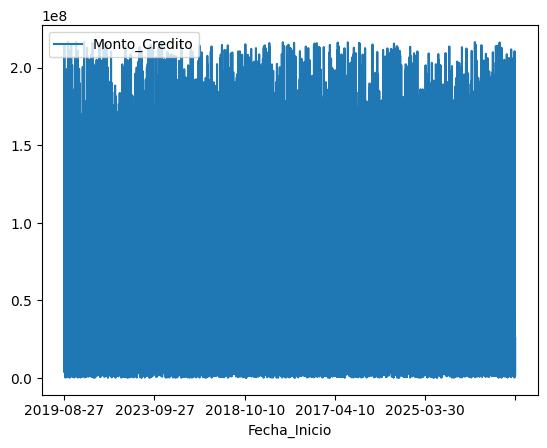

In [ ]:
# string fecha
df_bank_final.plot.line(x='Fecha_Inicio', y='Monto_Credito')

In [ ]:
# serie de tiempo ---> columna de fecha ----> grafico de lineas
# la serie de tiempo no se ve bien y hay muchos puntos

# Vemos el tipo de datos de tus columnas
df_bank_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nombre_Empresa  10000 non-null  object        
 1   Monto_Credito   10000 non-null  float64       
 2   Divisa          10000 non-null  object        
 3   Operacion       10000 non-null  object        
 4   Fecha_Inicio    10000 non-null  datetime64[ns]
 5   Fecha_Fin       10000 non-null  datetime64[ns]
 6   Plazo           10000 non-null  int64         
 7   Fecha_Reporte   10000 non-null  object        
 8   Zonas           10000 non-null  object        
 9   Ejecutivo       10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(6)
memory usage: 781.4+ KB


In [ ]:
df_bank_final['Fecha_Inicio'] = df_bank_final['Fecha_Inicio'].astype(str)

# 2025-09-01 ---> split("-") ---> [2025, 09, 01]
# df_bank_final['Fecha_Inicio'].apply(lambda x: x.split("-")[0] + x.split("-")[1])

# 0
#  1
#   2
#    3
#     4
#      5
#       6
#        7
# 20250901
#                                                                0:5
# range(0, 6): 0, 1, 2, 3, 4, 5
df_bank_final['Fecha_Inicio'].apply(lambda x: x.replace("-", "")[0:6])

,Fecha_Inicio
0,201908
1,201704
2,201704
3,202311
4,202410
...,...
9995,202101
9996,201702
9997,202005
9998,201705


## Pasar de una serie de tiempo diaria a una mensual

<Axes: xlabel='Fecha_Inicio_Mes'>

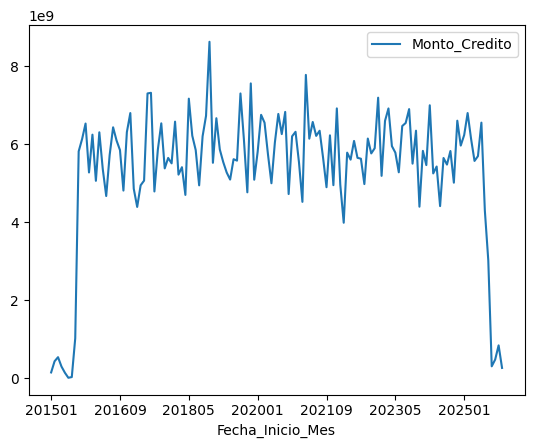

In [ ]:
df_bank_final['Fecha_Inicio_Mes'] = df_bank_final['Fecha_Inicio'].apply(lambda x: x.replace("-", "")[0:6])

df_bank_final_gby_sum_mes = df_bank_final[['Fecha_Inicio_Mes', 'Monto_Credito']].groupby('Fecha_Inicio_Mes').sum().reset_index()
df_bank_final_gby_sum_mes.plot.line(x='Fecha_Inicio_Mes', y='Monto_Credito')

In [ ]:
# pandas por defecto genera una numeracion
df_bank_final.to_excel("df_creditos_final.xlsx", index=False)

## Tablas dinámicas en pandas

### 📌 ¿Qué es?

* Es una función de pandas (pd.pivot_table) que permite reorganizar y agregar la información de un DataFrame.

* Toma columnas como filas (index), otras como columnas (columns) y calcula un valor agregado en las celdas con una función de agregación (aggfunc).

### 📌 ¿Qué hace?

* Agrupa los datos en función de las variables que le digas (ej. Ciudad, Género, Estado_Credito).

* Agrega los valores de otra columna con una función (ej. suma, promedio, conteo, máximo).

* Devuelve una nueva tabla que organiza los resultados de forma resumida y fácil de leer.

### Esqueleto

```python
pd.pivot_table(
    data,
    values=None,     # qué columna(s) quieres analizar
    index=None,      # se convierten en filas
    columns=None,    # se convierten en columnas
    aggfunc="mean",  # función de agregación (mean, sum, count, max, etc.)
    fill_value=None  # reemplazo para valores faltantes
)
```

In [ ]:
# Semilla para reproducibilidad
np.random.seed(42)

# Simulación de datos de créditos bancarios
n = 200

data = {
    "ID_Cliente": np.arange(1, n+1),
    "Genero": np.random.choice(["Masculino", "Femenino"], size=n),
    "Edad": np.random.randint(18, 70, size=n),
    "Ciudad": np.random.choice(["Ciudad de México", "Monterrey", "Guadalajara", "Puebla", "Querétaro"], size=n),
    "Tipo_Credito": np.random.choice(["Hipotecario", "Automotriz", "Personal", "Empresarial"], size=n),
    "Monto_Credito": np.random.randint(5000, 500000, size=n),
    "Tasa_Interes": np.round(np.random.uniform(5, 25, size=n), 2),
    "Estado_Credito": np.random.choice(["Activo", "Pagado", "En Mora"], size=n, p=[0.5, 0.3, 0.2])
}

df = pd.DataFrame(data)
df.head()

,ID_Cliente,Genero,Edad,Ciudad,Tipo_Credito,Monto_Credito,Tasa_Interes,Estado_Credito
0,1,Masculino,49,Guadalajara,Hipotecario,155159,8.60,Activo
1,2,Femenino,56,Guadalajara,Hipotecario,177502,18.93,Activo
2,3,Masculino,66,Monterrey,Hipotecario,160576,13.23,Activo
3,4,Masculino,69,Querétaro,Empresarial,405330,22.49,Pagado
4,5,Masculino,49,Ciudad de México,Automotriz,346003,15.30,Pagado


In [ ]:
# Promedio del monto de crédito por Ciudad y Tipo de Crédito
pd.pivot_table(
    df,
    values="Monto_Credito",
    index="Ciudad",
    columns="Tipo_Credito",
    aggfunc="mean"
)

Tipo_Credito,Automotriz,Empresarial,Hipotecario,Personal
Ciudad,,,,
Ciudad de México,154690.833333,288833.125000,284032.642857,168961.250000
Guadalajara,274754.500000,254608.666667,238721.230769,290938.400000
Monterrey,294430.538462,198463.700000,261787.692308,223215.916667
Puebla,256398.571429,162011.428571,304775.916667,253783.466667
Querétaro,175954.000000,212523.857143,292580.714286,227288.000000


In [ ]:
# Conteo de créditos por Género y Estado del Crédito
pd.pivot_table(
    df,
    values="ID_Cliente",       # usamos el ID solo para contar
    index="Genero",            # filas = Género
    columns="Estado_Credito",  # columnas = Estado del crédito
    aggfunc="count",           # contamos
    fill_value=0
)

Estado_Credito,Activo,En Mora,Pagado
Genero,,,
Femenino,48,19,33
Masculino,52,23,25


In [ ]:
# Tasa de interés promedio por Tipo de Crédito y Ciudad
pd.pivot_table(
    df,
    values="Tasa_Interes",
    index="Ciudad",            # filas = Ciudad
    columns="Tipo_Credito",    # columnas = Tipo de crédito
    aggfunc="mean"             # promedio
)

Tipo_Credito,Automotriz,Empresarial,Hipotecario,Personal
Ciudad,,,,
Ciudad de México,18.580000,18.683750,14.975000,18.632500
Guadalajara,13.036667,13.670000,14.766923,16.658000
Monterrey,17.473077,14.250000,13.125385,15.101667
Puebla,14.635714,16.297143,15.255833,14.557333
Querétaro,13.105000,15.152143,14.852857,16.157778


## Índices

* ``iloc``: Te permite hacer uso y filtrado de información con base en índices.
* ``iloc[i, j]``: accedes a la fila de índice ``i`` y la columna de índice ``j``.
* ``loc``: Te permite hacer uso y filtrado de información con base en índices y etiquetas
* ``loc[i, j]``: accedes a la fila de índice o etiqueta ``i`` y la columna de índice o etiqueta``j``.

index | Nombre (col_indice 0) | Edad (col_indice 1)
---|---|---
0|Luis|17
1|Fernando|24

Entonces, un ejemplo del uso de las funciones ``iloc`` y ``loc`` sería:

```python
# Accedemos al valor de la fila 0 y de la columna de indice 1
print(df.iloc[0, 1]) # 17
print(df.iloc[1, 1]) # 24
print(df.iloc[0, 0]) # Luis

print(df.loc[0, "Nombre"]) # Luis
print(df.loc[1, "Edad"]) # 24
```

los índices son muy útiles cuando queremos iterar sobre un dataframe

In [ ]:
# Recordemos que tenemos los valores de los tipos de cambio
print(usdValor, eurValor)

# y que tenemos el insumo original
display(df_bank.head())

18.48 21.69


,Nombre_Empresa,Monto_Credito,Divisa,Operacion,Fecha_Inicio,Fecha_Fin,Plazo
0,grupo bimbo,4117589.71,MXN,OP-100000,27-Aug-2019,"April 24, 2023",1336.0
1,WALMART DE MÉXICO,7008028.47,USD,OP-100001,2017-04-10,18/02/2022,1775.0
2,liverpool,9918174.32,EUR,OP-100002,"April 21, 2017",NaN,NaN
3,grupo lala,1293043.34,USD,OP-100003,24-Nov-2023,NaN,NaN
4,FEMSA,7128647.73,EUR,OP-100004,2024-10-30,NaN,NaN


podemos valorizar la columna ``Monto_Credito`` iterando sobre el dataframe como sigue:

In [ ]:
# En general, iteraremos sobre el index del dataframe
# El index es la columna numerica que se ve como la primer columna
# del dataframe

# Podemos acceder al indice de un dataframe escribiendo
df_bank.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
# asi, valoricemos la columna monto del credito con un bucle y
# con la función loc (se recomienda en estos caso el uso de loc
# sobre el de iloc)

# Creamos un columna nueva
df_bank['Monto_Credito_Valorizado'] = 0

# Recorremos el indice del dataframe
# es decir, estamos recorriendo la numeracion de las filas
# del dataframe
for i in df_bank.index:
  # Accedemos al monto del credito de la fila i
  monto_i = df_bank.loc[i, 'Monto_Credito']

  # Valorizamos dependiendo el tipo de cambio
  divisa_i = df_bank.loc[i, 'Divisa']
  if divisa_i == "USD":
    monto_i_val = monto_i * usdValor
  elif divisa_i == "EUR":
    monto_i_val = monto_i * eurValor
  else:
    monto_i_val = monto_i * 1

  # Rellenamos la informacion de la columna nueva
  # insertando el valor obtenido i en la fila i
  # correspondiente
  df_bank.loc[i, 'Monto_Credito_Valorizado'] = monto_i_val

df_bank[['Monto_Credito', 'Divisa', 'Monto_Credito_Valorizado']]

,Monto_Credito,Divisa,Monto_Credito_Valorizado
0,4117589.71,MXN,4.117590e+06
1,7008028.47,USD,1.295084e+08
2,9918174.32,EUR,2.151252e+08
3,1293043.34,USD,2.389544e+07
4,7128647.73,EUR,1.546204e+08
...,...,...,...
9995,7649613.74,MXN,7.649614e+06
9996,1578366.47,MXN,1.578366e+06
9997,2057031.71,MXN,2.057032e+06
9998,6555258.51,MXN,6.555259e+06


In [ ]:
df_bank.columns

Index(['Nombre_Empresa', 'Monto_Credito', 'Divisa', 'Operacion',
       'Fecha_Inicio', 'Fecha_Fin', 'Plazo', 'Monto_Credito_Valorizado'],
      dtype='object')

# Filtro avanzado con índices y NumPy

In [ ]:
# Para eliminar filas dentro de un dataframe, en esencia
# 1. Los indices son identificadores del dataframes
# 2. Realizamos un filtro de índices
# 3. Quitamos esos indices del dataframe a considerar